In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import time
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
register_matplotlib_converters()

In [ ]:
def parse_date(date_str):
    return datetime.fromtimestamp(time.mktime(time.strptime(date_str, "%Y-%m-%dT%H:%M")))    

def extract_sausage(name, col):
    sausage_df = pd.concat([col.reset_index()]).rename(columns={'index' : 'time', name : 'weight'})
    id_df = pd.DataFrame(np.repeat(name, col.shape[0]), columns=['id'])
    sausage_df = pd.concat([sausage_df, id_df], axis=1)
    sausage_df['time'] = sausage_df['time'].apply(parse_date)
    sausage_df['loss'] = sausage_df['weight'] / sausage_df['weight'].iloc[0]
    sausage_df['id'] = sausage_df['id'].apply(lambda x: idx_to_name[x                                                 ])
    return sausage_df

## batch - 02

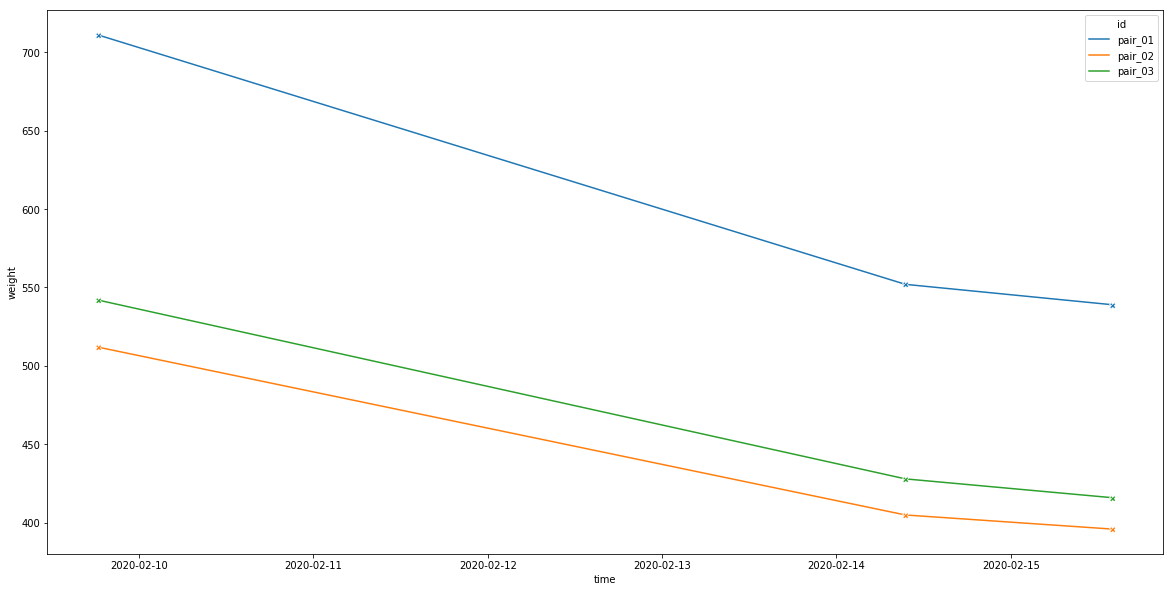

In [63]:
df = pd.read_csv('./data/jerk_02.csv').T
idx_to_name = {0 : 'pair_01', 1: 'pair_02', 2: 'pair_03'}
sausages_df = pd.concat([extract_sausage(name, col) for name, col in df.iteritems()])
plt.figure(figsize=(20, 10))
sns.lineplot(x='time', y='weight', hue='id', data=sausages_df, marker='X')

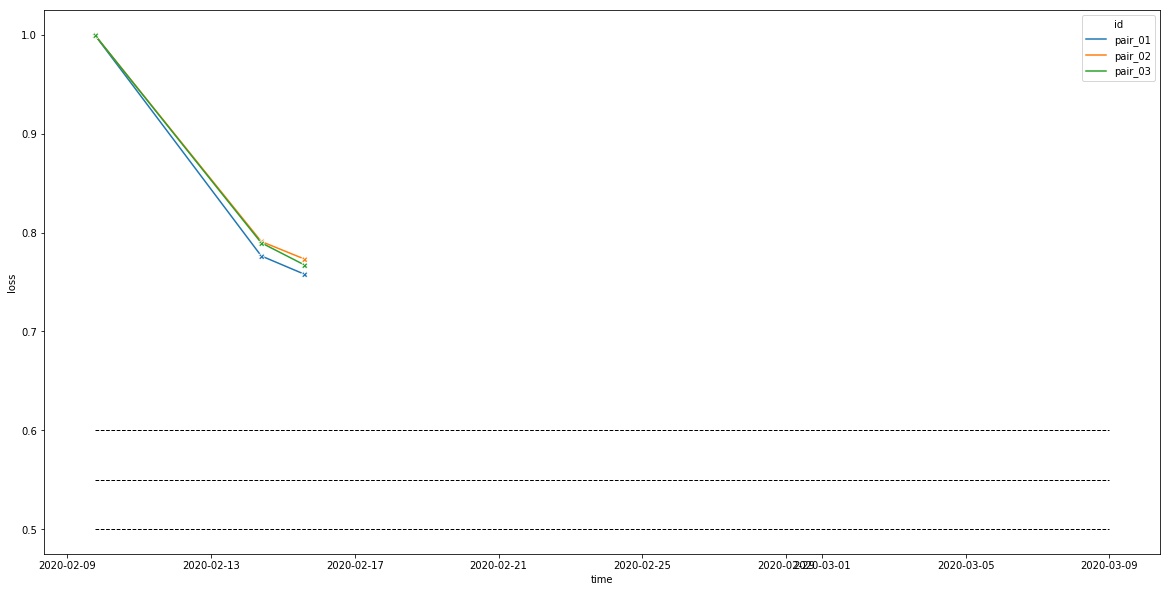

In [64]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='time', y='loss', hue='id', data=sausages_df, marker='X')
d0 = sausages_df['time'].iloc[0]
dn = pd.Timestamp(d0.year, d0.month + 1, d0.day)
plt.plot([d0, dn], [0.6, 0.6], linewidth=1, color='black', linestyle='--')
plt.plot([d0, dn], [0.55, 0.55], linewidth=1, color='black', linestyle='--')
plt.plot([d0, dn], [0.5, 0.5], linewidth=1, color='black', linestyle='--')

## batch - 01

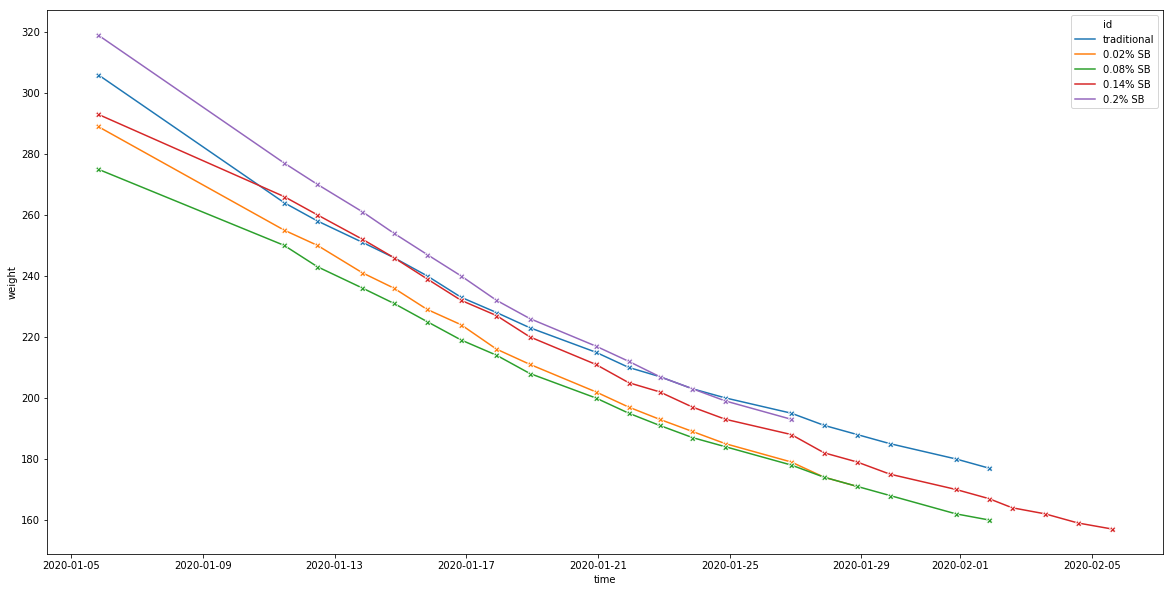

In [60]:
df = pd.read_csv('./data/jerk_01.csv').T
idx_to_name = {0 : 'traditional', 1: '0.02% SB', 2: '0.08% SB', 3: '0.14% SB' , 4: '0.2% SB'}
sausages_df = pd.concat([extract_sausage(name, col) for name, col in df.iteritems()])
plt.figure(figsize=(20, 10))
sns.lineplot(x='time', y='weight', hue='id', data=sausages_df, marker='X')

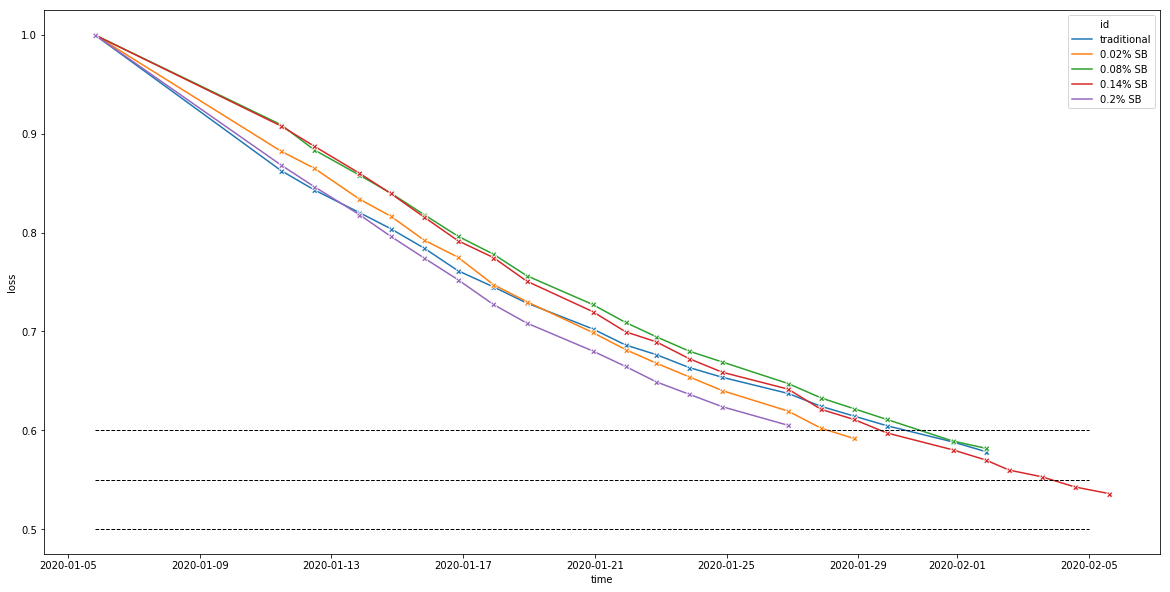

In [57]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='time', y='loss', hue='id', data=sausages_df, marker='X')
d0 = sausages_df['time'].iloc[0]
dn = pd.Timestamp(d0.year, d0.month + 1, d0.day)
plt.plot([d0, dn], [0.6, 0.6], linewidth=1, color='black', linestyle='--')
plt.plot([d0, dn], [0.55, 0.55], linewidth=1, color='black', linestyle='--')
plt.plot([d0, dn], [0.5, 0.5], linewidth=1, color='black', linestyle='--')

In [59]:
sausages_df[sausages_df['id'] == '0.14% SB']

,time,weight,id,loss
0,2020-01-05 19:30:00,293.0,0.14% SB,1.000000
1,2020-01-11 11:15:00,266.0,0.14% SB,0.907850
2,2020-01-12 11:30:00,260.0,0.14% SB,0.887372
3,2020-01-13 20:20:00,252.0,0.14% SB,0.860068
4,2020-01-14 19:10:00,246.0,0.14% SB,0.839590
5,2020-01-15 19:30:00,239.0,0.14% SB,0.815700
6,2020-01-16 20:10:00,232.0,0.14% SB,0.791809
7,2020-01-17 22:00:00,227.0,0.14% SB,0.774744
8,2020-01-18 22:20:00,220.0,0.14% SB,0.750853
9,2020-01-20 22:20:00,211.0,0.14% SB,0.720137
